In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

Loading and cleaning the data

In [ ]:
leasesname = '/Users/gracepost/Documents/sac/Leases.csv'
leasesStart = pd.read_csv(leasesname)
leases_df = leasesStart[leasesStart['leasedSF'] >= 10000]

marketname = '/Users/gracepost/Documents/sac/Major_Market_Occupancy_Data_revised.csv'
marke_df = pd.read_csv(marketname)

pricename = '/Users/gracepost/Documents/sac/Price_and Availability_Data.csv'
price_df = pd.read_csv(pricename)

unemploymentname = '/Users/gracepost/Documents/sac/Unemployment.csv'
unemployment_df = pd.read_csv(unemploymentname)

Sectors that Savills is focused on in **Manhattan**

In [ ]:
# Sectors separated
tech = leasesStart[leasesStart['internal_industry'] == 'Technology, Advertising, Media, and Information']
finance = leasesStart[leasesStart['internal_industry'] == 'Financial Services and Insurance']
legal = leasesStart[leasesStart['internal_industry'] == 'Legal Services']

# Specifically in manhattan
man_tech = tech[tech['market'] == 'Manhattan']
man_finance = finance[finance['market'] == 'Manhattan']

# Plot
plt.figure(figsize=(8, 5))  # Optional: adjust the size of the plot
x = np.arange(len(man_finance['transaction_type'].unique()))  # the label locations

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(x, man_finance[man_finance['transaction_type'] == 'Renewal'], label='Renewal', color='steelblue')

plt.xlabel('Item')
plt.ylabel('Price')
plt.title('Price of Items')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
# Tyler's code



leases_df = leases_df[leases_df.leasedSF > 10000]
leases_df = leases_df[leases_df.internal_industry.isin(["Financial Services and Insurance", "Technology, Advertising, Media, and Information", "Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting"])]

RBA = leases_df.dropna(subset=['availability_proportion'])

# Group the data by market, internal_class (O/A), year, and quarter
df_grouped = RBA.groupby(['market', 'internal_class', 'year', 'quarter']).agg({
    'availability_proportion': 'mean',
    'overall_rent' : 'mean'
}).reset_index()

# Sort the data to ensure proper order for calculating differences
df_grouped = df_grouped.sort_values(by=['market', 'internal_class', 'year', 'quarter'])

# Initialize an empty list to store the differences
differences = []

# Iterate over each market and internal_class (O/A)
for (market, internal_class), group in df_grouped.groupby(['market', 'internal_class']):
    group = group.reset_index(drop=True)  # Reset index for easier iteration
    for i in range(1, len(group)):  # Start from the second row to calculate differences
        diff = group.loc[i, 'availability_proportion'] - group.loc[i - 1, 'availability_proportion']
        differences.append({
            'market': market,
            'internal_class': internal_class,
            'year': group.loc[i, 'year'],
            'quarter': group.loc[i, 'quarter'],
            'time_index': f"{group.loc[i, 'year']}-Q{group.loc[i, 'quarter']}",  # Combine year and quarter
            'difference': diff,
            'availability_proportion': group.loc[i, 'availability_proportion'],
            'overall_rent': group.loc[i, 'overall_rent']

        })

# Convert the differences list into a DataFrame for easier analysis
differences_df = pd.DataFrame(differences)

# Set the 'time_index' as the index for easier plotting
#differences_df.set_index('time_index', inplace=True)

# Display the result
print(differences_df)


ready2graph = differences_df[(differences_df['market'] == 'Manhattan') & (differences_df['internal_class'] == 'A')]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6)) # 2 rows, 1 column

axes[0].plot(ready2graph.time_index, ready2graph.availability_proportion, label='Availability Proporiton')
axes[1].plot(ready2graph.time_index, -ready2graph.overall_rent, label='rent')

plt.xlabel('Time (Year-Quarter)')
plt.ylabel('Difference in Availability Proportion')
plt.show()# Convert the differences list into a DataFrame for easier analysis
differences_df = pd.DataFrame(differences)

# Display the result
print(differences_df)


leases_df.columns

leases_no_missing = leases_df.dropna(subset=["internal_industry"])

markets_by_industry = leases_no_missing.groupby(['internal_industry'])["market"].value_counts()

markets_by_industry.iloc[1]

tech = leases_no_missing[leases_no_missing.internal_industry == "Technology, Advertising, Media, and Information"]
finance = leases_no_missing[leases_no_missing.internal_industry == "Financial Services and Insurance"]



#tech["market"].value_counts(normalize=True)
proportion = finance.groupby('year')['market'].value_counts(normalize=True)

dictionary = {
    'year':proportion.index.get_level_values(0),
    'market':proportion.index.get_level_values(1),
    'proportion':proportion.values
}

df = pd.DataFrame(dictionary)

for market in ['Manhattan', 'Dallas/Ft Worth', 'Chicago', 'Atlanta']:
    temp = df[df.market == market]
    plt.plot(temp.year, temp.proportion, label=market)
plt.legend()
plt.show()

# Define your focus markets
markets = ['Manhattan', 'Dallas/Ft Worth', 'Chicago', 'Atlanta']

# Replace non-focus markets with 'Other'
df['market_grouped'] = df['market'].where(df['market'].isin(markets), 'Other')

# Group again to recalculate proportions with 'Other'
grouped = df.groupby(['year', 'market_grouped'])['proportion'].sum().reset_index()

# Pivot for stacked bar chart
pivot_df = grouped.pivot(index='year', columns='market_grouped', values='proportion')

# Ensure consistent column order
column_order = markets + ['Other']
pivot_df = pivot_df[column_order]  # This will error if 'Other' isn't present—optional safeguard

# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.ylabel('Proportion')
plt.title('Market Proportion by Year (Stacked with "Other")')
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

playing around with sublets, kinda pointless

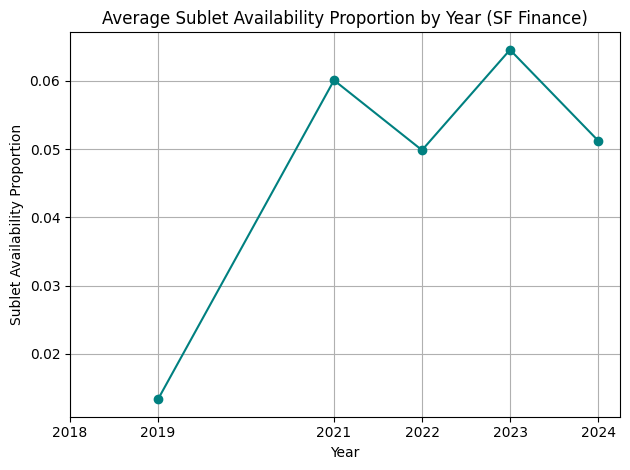

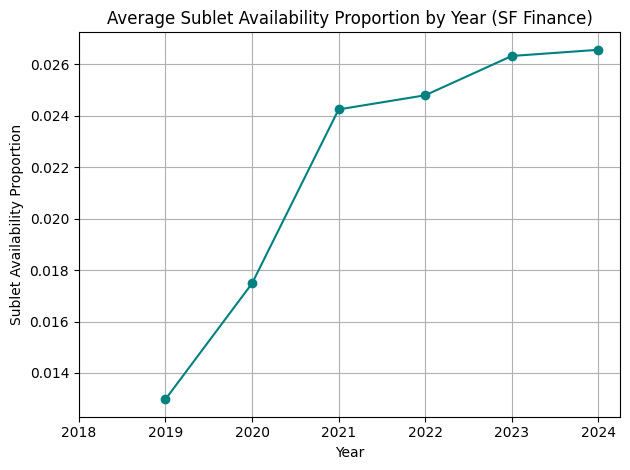

In [38]:
# less or more struggle?
tech = leases_df[leases_df['internal_industry'] == 'Technology, Advertising, Media, and Information']
finance = leases_df[leases_df['internal_industry'] == 'Financial Services and Insurance']
legal = leases_df[leases_df['internal_industry'] == 'Legal Services']

# Specifically in manhattan
man_tech = tech[tech['market'] == 'Manhattan']
man_finance = finance[finance['market'] == 'Manhattan']

# Specifically in sf
sf_tech = tech[tech['market'] == 'San Francisco']
sf_finance = finance[finance['market'] == 'San Francisco']

sf_finance_by_year = sf_finance.groupby('year')['sublet_availability_proportion'].mean().reset_index()
man_finance_by_year = man_finance.groupby('year')['sublet_availability_proportion'].mean().reset_index()

# Plot
plt.plot(sf_finance_by_year['year'], sf_finance_by_year['sublet_availability_proportion'], marker='o', color='teal')
plt.title('Average Sublet Availability Proportion by Year (SF Finance)')
plt.xlabel('Year')
plt.ylabel('Sublet Availability Proportion')
plt.grid(True)
plt.xticks(sf_finance_by_year['year'])  # show all years
plt.tight_layout()
plt.show()

plt.plot(man_finance_by_year['year'], man_finance_by_year['sublet_availability_proportion'], marker='o', color='teal')
plt.title('Average Sublet Availability Proportion by Year (SF Finance)')
plt.xlabel('Year')
plt.ylabel('Sublet Availability Proportion')
plt.grid(True)
plt.xticks(man_finance_by_year['year'])  # show all years
plt.tight_layout()
plt.show()

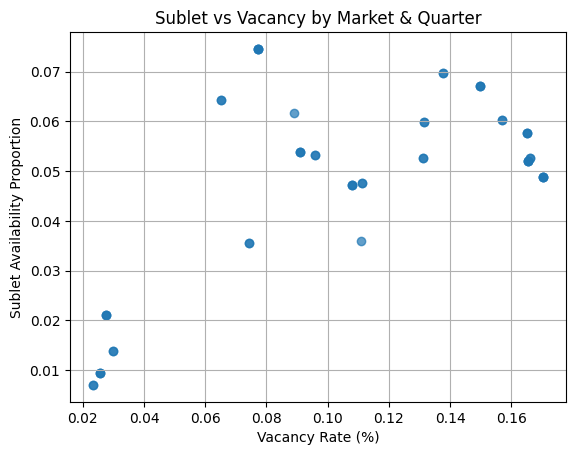

In [40]:
plt.scatter(sf_finance['direct_availability_proportion'], sf_finance['sublet_availability_proportion'], alpha=0.7)
plt.xlabel('Vacancy Rate (%)')
plt.ylabel('Sublet Availability Proportion')
plt.title('Sublet vs Vacancy by Market & Quarter')
plt.grid(True)
plt.show()

simple model for availability proportion

In [51]:
from sklearn.linear_model import LinearRegression

# Create numeric quarter/year value (e.g., 2020 Q1 = 0, 2020 Q2 = 1, etc.)
sf_finance['time_idx'] = np.arange(len(sf_finance))
man_finance['time_idx'] = np.arange(len(man_finance))

# Fit regression model to rent over time
model_sf = LinearRegression().fit(sf_finance[['time_idx']], sf_finance['availability_proportion'])
model_man = LinearRegression().fit(man_finance[['time_idx']], man_finance['availability_proportion'])

# Predict future rent
future_time = np.array([[len(sf_finance) + 1]])  # one quarter ahead
pred_sf = model_sf.predict(future_time)[0]
pred_man = model_man.predict(future_time)[0]

print(f"Predicted next quarter availability proportion in SF: {pred_sf:.2}")
print(f"Predicted next quarter availability proportion in Manhattan: {pred_man:.2}")

# Get coefficients
intercept = model_sf.intercept_
coefficients = model_sf.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)


Predicted next quarter availability proportion in SF: 0.26
Predicted next quarter availability proportion in Manhattan: 0.15
Intercept: 0.185988669797583
Coefficients: [0.00117503]


/var/folders/85/9jfv9vrd46j4571y8y8csfzw0000gn/T/ipykernel_96296/1064864379.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_finance['time_idx'] = np.arange(len(sf_finance))
/var/folders/85/9jfv9vrd46j4571y8y8csfzw0000gn/T/ipykernel_96296/1064864379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man_finance['time_idx'] = np.arange(len(man_finance))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid f

tyler's code for merged

In [54]:
cities_to_state = {
    'Atlanta' : 'GA',
    'Austin' : 'TX',
    'Baltimore' : 'MD',
    'Boston' : 'MA',
    'Charlotte' : 'NC',
    'Chicago' : 'IL',
    'Chicago Suburbs' : 'IL',
    'Dallas/Ft Worth' : 'TX',
    'Denver' : 'CO',
    'Detroit' : 'MI',
    'Houston' : 'TX',
    'Los Angeles':'CA',
    'Manhattan':'NY',
    'Nashville': 'TN',
    'Northern New Jersey' : 'NJ',
    'Northern Virginia' : 'VA', 
    'Orange County' : 'CA',
    'Philadelphia' : 'PA',
    'Phoenix' : 'AZ',
    'Raleigh/Durham' : 'NC',
    'Salt Lake City' : 'UT',
    'San Diego' : 'CA',
    'San Francisco' : 'CA',
    'Seattle' : 'WA',
    'South Bay/San Jose' : 'CA',
    'South Florida' : 'FL',
    'Southern Maryland' : 'MD',
    'Tampa' : 'FL',
    'Washington D.C' : 'MD'
}

#deleting leases under 10000sf and the industry is in 
leases_df = leases_df[leases_df.leasedSF > 10000]
leases_df = leases_df[leases_df.internal_industry.isin([
    "Financial Services and Insurance",
    "Technology, Advertising, Media, and Information",
    "Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting"
])]

leases_df['state'] = leases_df['market'].map(cities_to_state)

RBA = leases_df.dropna(subset=['availability_proportion'])

# Group the data by market, internal_class (O/A), year, and quarter
df_grouped = RBA.groupby(['state', 'market', 'internal_class', 'year', 'quarter']).agg({
    'availability_proportion': 'mean',
    'overall_rent' : 'mean'
}).reset_index()

# Sort the data to ensure proper order for calculating differences
df_grouped = df_grouped.sort_values(by=['state','market', 'internal_class', 'year', 'quarter'])

# Initialize an empty list to store the differences
differences = []

# Iterate over each market and internal_class (O/A)
for (state, market, internal_class), group in df_grouped.groupby(['state','market', 'internal_class']):
    group = group.reset_index(drop=True)  # Reset index for easier iteration
    for i in range(1, len(group)):  # Start from the second row to calculate differences
        diff = group.loc[i, 'availability_proportion'] - group.loc[i - 1, 'availability_proportion']
        differences.append({
            'state' : state,
            'market': market,
            'internal_class': internal_class,
            'year': group.loc[i, 'year'],
            'quarter': group.loc[i, 'quarter'],
            'time_index': f"{group.loc[i, 'year']}-{group.loc[i, 'quarter']}",  # Combine year and quarter
            'difference': diff,
            'availability_proportion': group.loc[i, 'availability_proportion'],
            'overall_rent': group.loc[i, 'overall_rent']

        })

# Convert the differences list into a DataFrame for easier analysis
differences_df = pd.DataFrame(differences)

unemployment_df.rename(columns={'Year': 'year', 'Quarter': 'quarter'}, inplace=True)

unemployment_df = unemployment_df.groupby(['state','year','quarter']).agg({'unemployment_rate':'mean'}).reset_index()


merged = differences_df.merge(
    unemployment_df,  # Select relevant columns
    on=['state', 'year', 'quarter'],  # Merge keys
    how='left'  # Use 'left' join to keep all rows in differences_df
)

print(merged.head())

  state   market internal_class  year quarter time_index  difference  \
0    AZ  Phoenix              A  2018      Q2    2018-Q2    0.016586   
1    AZ  Phoenix              A  2018      Q3    2018-Q3    0.013740   
2    AZ  Phoenix              A  2018      Q4    2018-Q4    0.000354   
3    AZ  Phoenix              A  2019      Q1    2019-Q1   -0.010936   
4    AZ  Phoenix              A  2019      Q2    2019-Q2   -0.006202   

   availability_proportion  overall_rent  unemployment_rate  
0                 0.186043     26.231819           4.700000  
1                 0.199783     26.816695           4.733333  
2                 0.200137     27.361708           4.966667  
3                 0.189200     27.145068           4.966667  
4                 0.182998     27.395518           4.800000  


model 

In [66]:

sf_merged = merged[merged['market'] == 'San Francisco']
man_merged = merged[merged['market'] == 'Manhattan']
features = ['overall_rent', 'unemployment_rate']

def func(features, data):
    # Define X and y
    X = data[features]
    y = data['difference']

    # Fit the model
    model = LinearRegression()
    model.fit(X, y)

    # Predictions (optional)
    y_pred = model.predict(X)

    coeff_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    })

    print("Intercept:", model.intercept_)
    print(coeff_df)

func(features, man_merged)

Intercept: -0.008209430801641254
             Feature  Coefficient
0       overall_rent     0.000043
1  unemployment_rate     0.001403
